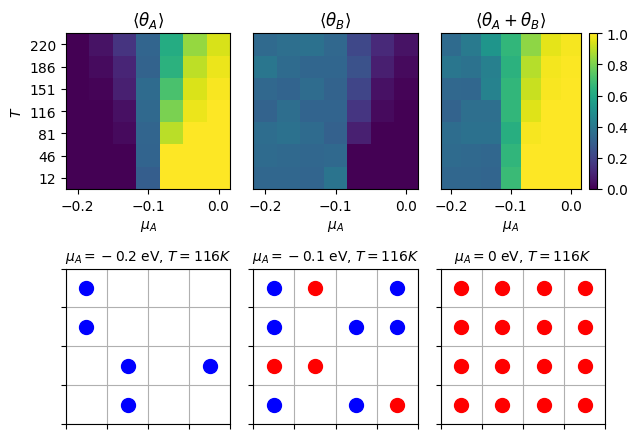

<Figure size 640x480 with 0 Axes>

In [1]:
from gcmc_fns import *

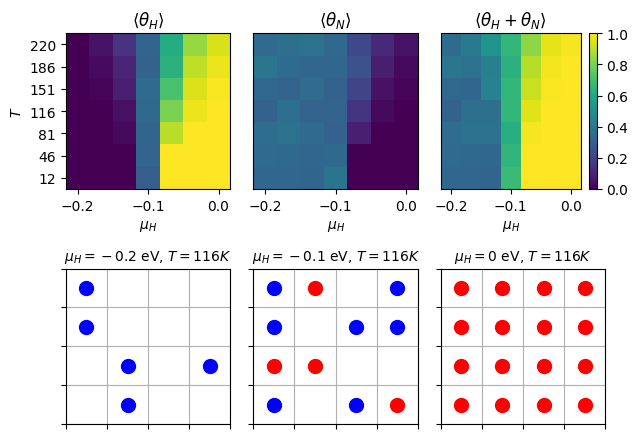

In [2]:
#Same parameters as Example Simulation, should match picture from L19
#T in 1/kbT unit
#Ideal Mixture, let A represent Hydrogen, let B represent Nitrogen in code
size = 4
n_steps = 10000
mus_A = np.linspace(-0.2, 0, 7)
Ts = np.linspace(0.001, 0.019, 7)
params = []
for mu_A in mus_A:
    for T in Ts:
        params.append({'epsilon_A': -0.1,
        'epsilon_B': -0.1,
        'epsilon_AA': 0,
        'epsilon_BB': 0,
        'epsilon_AB': 0,
        'mu_A': mu_A,
        'mu_B': -0.1,
        'T': T})
# Run the simulation
np.random.seed(42)
final_lattice = np.zeros((len(mus_A), len(Ts), size, size))
mean_coverage_A = np.zeros((len(mus_A), len(Ts)))
mean_coverage_B = np.zeros((len(mus_A), len(Ts)))
for i, param in enumerate(params):
    lattice, coverage_A, coverage_B = run_simulation(size, n_steps, param)
    final_lattice[i // len(Ts), i % len(Ts)] = lattice
    mean_coverage_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mean_coverage_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

# Plot the T-mu_A phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts, mean_coverage_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_H \rangle$')
axs[0].set_xlabel(r'$\mu_H$')
axs[0].set_ylabel(r'$T$')
axs[0].set_yticks([Ts[0], Ts[1], Ts[2], Ts[3], Ts[4], Ts[5], Ts[6]])
axs[0].set_yticklabels([round(Ts[0]/0.0000861733), round(Ts[1]/0.0000861733), round(Ts[2]/0.0000861733), round(Ts[3]/0.0000861733), round(Ts[4]/0.0000861733), round(Ts[5]/0.0000861733), round(Ts[6]/0.0000861733)])

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts, mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_N \rangle$')
axs[1].set_xlabel(r'$\mu_H$')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts, mean_coverage_A.T + mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_H + \theta_N \rangle$')
axs[2].set_xlabel(r'$\mu_H$')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)

# Plot the final lattice configuration

# mu_A = -0.2 eV and T = 116K
axs[3] = plot_lattice(final_lattice[0, 3], axs[3], r'$\mu_H = -0.2$ eV, $T = 116K$')

# mu_A = -0.1 eV and T = 116K
axs[4] = plot_lattice(final_lattice[3, 3], axs[4], r'$\mu_H = -0.1$ eV, $T = 116K$')

# mu_A = 0 eV and T = 116K
axs[5] = plot_lattice(final_lattice[6, 3], axs[5], r'$\mu_H = 0$ eV, $T = 116K$')

plt.tight_layout()
plt.show()

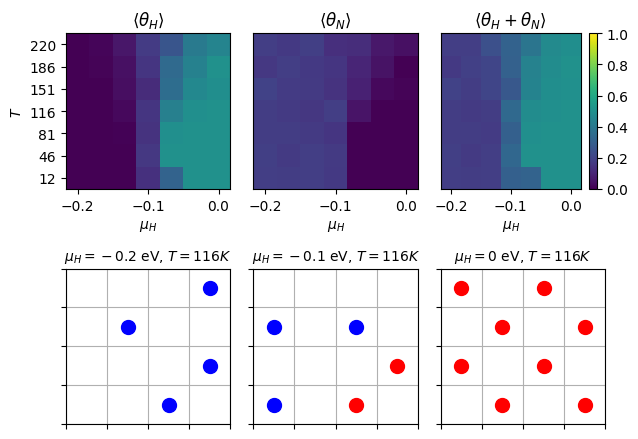

In [3]:
#Repulsive Interactions
size = 4
n_steps = 10000
mus_A = np.linspace(-0.2, 0, 7)
Ts = np.linspace(0.001, 0.019, 7)
params = []
for mu_A in mus_A:
    for T in Ts:
        params.append({'epsilon_A': -0.1,
        'epsilon_B': -0.1,
        'epsilon_AA': 0.05,
        'epsilon_BB': 0.05,
        'epsilon_AB': 0.05,
        'mu_A': mu_A,
        'mu_B': -0.1,
        'T': T})
# Run the simulation
np.random.seed(42)
final_lattice = np.zeros((len(mus_A), len(Ts), size, size))
mean_coverage_A = np.zeros((len(mus_A), len(Ts)))
mean_coverage_B = np.zeros((len(mus_A), len(Ts)))
for i, param in enumerate(params):
    lattice, coverage_A, coverage_B = run_simulation(size, n_steps, param)
    final_lattice[i // len(Ts), i % len(Ts)] = lattice
    mean_coverage_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mean_coverage_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

# Plot the T-mu_A phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts, mean_coverage_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_H \rangle$')
axs[0].set_xlabel(r'$\mu_H$')
axs[0].set_ylabel(r'$T$')
axs[0].set_yticks([Ts[0], Ts[1], Ts[2], Ts[3], Ts[4], Ts[5], Ts[6]])
axs[0].set_yticklabels([round(Ts[0]/0.0000861733), round(Ts[1]/0.0000861733), round(Ts[2]/0.0000861733), round(Ts[3]/0.0000861733), round(Ts[4]/0.0000861733), round(Ts[5]/0.0000861733), round(Ts[6]/0.0000861733)])

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts, mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_N \rangle$')
axs[1].set_xlabel(r'$\mu_H$')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts, mean_coverage_A.T + mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_H + \theta_N \rangle$')
axs[2].set_xlabel(r'$\mu_H$')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)

# Plot the final lattice configuration

# mu_A = -0.2 eV and T = 116K
axs[3] = plot_lattice(final_lattice[0, 3], axs[3], r'$\mu_H = -0.2$ eV, $T = 116K$')

# mu_A = -0.1 eV and T = 116K
axs[4] = plot_lattice(final_lattice[3, 3], axs[4], r'$\mu_H = -0.1$ eV, $T = 116K$')

# mu_A = 0 eV and T = 116K
axs[5] = plot_lattice(final_lattice[6, 3], axs[5], r'$\mu_H = 0$ eV, $T = 116K$')

plt.tight_layout()
plt.show()

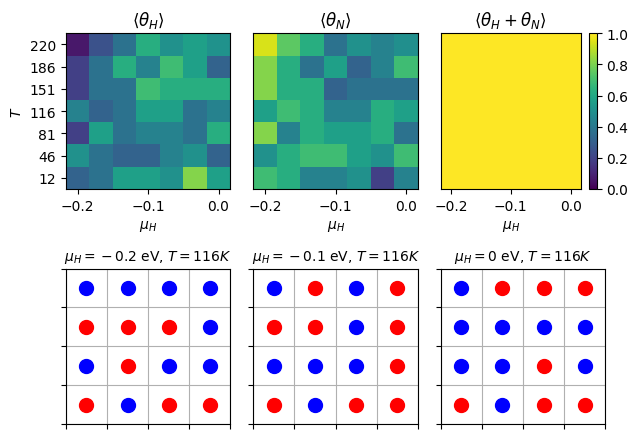

In [4]:
#Attractive Interactions
size = 4
n_steps = 10000
mus_A = np.linspace(-0.2, 0, 7)
Ts = np.linspace(0.001, 0.019, 7)
params = []
for mu_A in mus_A:
    for T in Ts:
        params.append({'epsilon_A': -0.1,
        'epsilon_B': -0.1,
        'epsilon_AA': -0.05,
        'epsilon_BB': -0.05,
        'epsilon_AB': -0.05,
        'mu_A': mu_A,
        'mu_B': -0.1,
        'T': T})
# Run the simulation
np.random.seed(42)
final_lattice = np.zeros((len(mus_A), len(Ts), size, size))
mean_coverage_A = np.zeros((len(mus_A), len(Ts)))
mean_coverage_B = np.zeros((len(mus_A), len(Ts)))
for i, param in enumerate(params):
    lattice, coverage_A, coverage_B = run_simulation(size, n_steps, param)
    final_lattice[i // len(Ts), i % len(Ts)] = lattice
    mean_coverage_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mean_coverage_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

# Plot the T-mu_A phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts, mean_coverage_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_H \rangle$')
axs[0].set_xlabel(r'$\mu_H$')
axs[0].set_ylabel(r'$T$')
axs[0].set_yticks([Ts[0], Ts[1], Ts[2], Ts[3], Ts[4], Ts[5], Ts[6]])
axs[0].set_yticklabels([round(Ts[0]/0.0000861733), round(Ts[1]/0.0000861733), round(Ts[2]/0.0000861733), round(Ts[3]/0.0000861733), round(Ts[4]/0.0000861733), round(Ts[5]/0.0000861733), round(Ts[6]/0.0000861733)])

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts, mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_N \rangle$')
axs[1].set_xlabel(r'$\mu_H$')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts, mean_coverage_A.T + mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_H + \theta_N \rangle$')
axs[2].set_xlabel(r'$\mu_H$')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)

# Plot the final lattice configuration

# mu_A = -0.2 eV and T = 116K
axs[3] = plot_lattice(final_lattice[0, 3], axs[3], r'$\mu_H = -0.2$ eV, $T = 116K$')

# mu_A = -0.1 eV and T = 116K
axs[4] = plot_lattice(final_lattice[3, 3], axs[4], r'$\mu_H = -0.1$ eV, $T = 116K$')

# mu_A = 0 eV and T = 116K
axs[5] = plot_lattice(final_lattice[6, 3], axs[5], r'$\mu_H = 0$ eV, $T = 116K$')

plt.tight_layout()
plt.show()

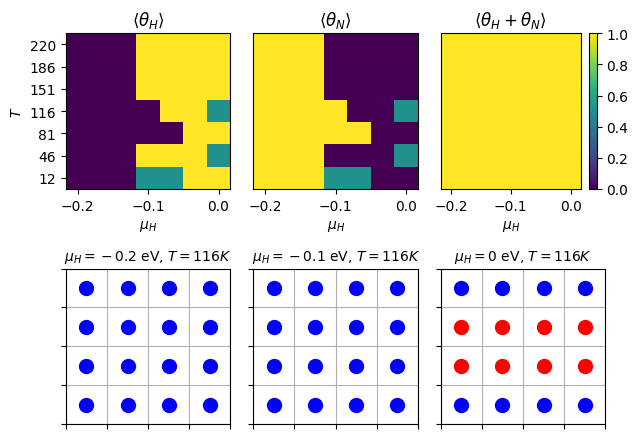

In [5]:
#Immiscible
size = 4
n_steps = 10000
mus_A = np.linspace(-0.2, 0, 7)
Ts = np.linspace(0.001, 0.019, 7)
params = []
for mu_A in mus_A:
    for T in Ts:
        params.append({'epsilon_A': -0.1,
        'epsilon_B': -0.1,
        'epsilon_AA': -0.05,
        'epsilon_BB': -0.05,
        'epsilon_AB': 0.05,
        'mu_A': mu_A,
        'mu_B': -0.1,
        'T': T})
# Run the simulation
np.random.seed(42)
final_lattice = np.zeros((len(mus_A), len(Ts), size, size))
mean_coverage_A = np.zeros((len(mus_A), len(Ts)))
mean_coverage_B = np.zeros((len(mus_A), len(Ts)))
for i, param in enumerate(params):
    lattice, coverage_A, coverage_B = run_simulation(size, n_steps, param)
    final_lattice[i // len(Ts), i % len(Ts)] = lattice
    mean_coverage_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mean_coverage_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

# Plot the T-mu_A phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts, mean_coverage_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_H \rangle$')
axs[0].set_xlabel(r'$\mu_H$')
axs[0].set_ylabel(r'$T$')
axs[0].set_yticks([Ts[0], Ts[1], Ts[2], Ts[3], Ts[4], Ts[5], Ts[6]])
axs[0].set_yticklabels([round(Ts[0]/0.0000861733), round(Ts[1]/0.0000861733), round(Ts[2]/0.0000861733), round(Ts[3]/0.0000861733), round(Ts[4]/0.0000861733), round(Ts[5]/0.0000861733), round(Ts[6]/0.0000861733)])

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts, mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_N \rangle$')
axs[1].set_xlabel(r'$\mu_H$')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts, mean_coverage_A.T + mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_H + \theta_N \rangle$')
axs[2].set_xlabel(r'$\mu_H$')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)

# Plot the final lattice configuration

# mu_A = -0.2 eV and T = 116K
axs[3] = plot_lattice(final_lattice[0, 3], axs[3], r'$\mu_H = -0.2$ eV, $T = 116K$')

# mu_A = -0.1 eV and T = 116K
axs[4] = plot_lattice(final_lattice[3, 3], axs[4], r'$\mu_H = -0.1$ eV, $T = 116K$')

# mu_A = 0 eV and T = 116K
axs[5] = plot_lattice(final_lattice[6, 3], axs[5], r'$\mu_H = 0$ eV, $T = 116K$')

plt.tight_layout()
plt.show()


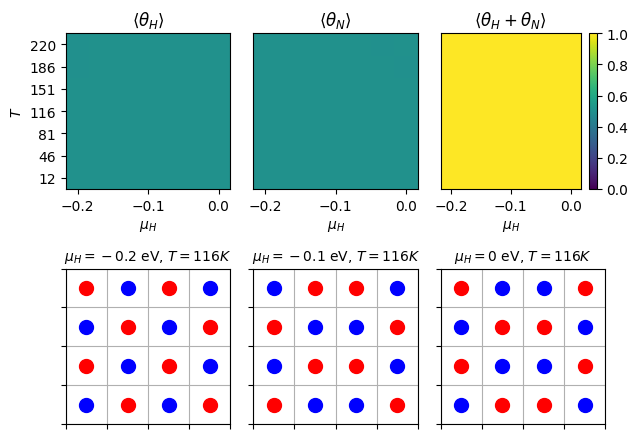

In [6]:
#Like Dissolves Unlike
size = 4
n_steps = 10000
mus_A = np.linspace(-0.2, 0, 7)
Ts = np.linspace(0.001, 0.019, 7)
params = []
for mu_A in mus_A:
    for T in Ts:
        params.append({'epsilon_A': -0.1,
        'epsilon_B': -0.1,
        'epsilon_AA': 0.05,
        'epsilon_BB': 0.05,
        'epsilon_AB': -0.05,
        'mu_A': mu_A,
        'mu_B': -0.1,
        'T': T})
# Run the simulation
np.random.seed(42)
final_lattice = np.zeros((len(mus_A), len(Ts), size, size))
mean_coverage_A = np.zeros((len(mus_A), len(Ts)))
mean_coverage_B = np.zeros((len(mus_A), len(Ts)))
for i, param in enumerate(params):
    lattice, coverage_A, coverage_B = run_simulation(size, n_steps, param)
    final_lattice[i // len(Ts), i % len(Ts)] = lattice
    mean_coverage_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mean_coverage_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

# Plot the T-mu_A phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts, mean_coverage_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_H \rangle$')
axs[0].set_xlabel(r'$\mu_H$')
axs[0].set_ylabel(r'$T$')
axs[0].set_yticks([Ts[0], Ts[1], Ts[2], Ts[3], Ts[4], Ts[5], Ts[6]])
axs[0].set_yticklabels([round(Ts[0]/0.0000861733), round(Ts[1]/0.0000861733), round(Ts[2]/0.0000861733), round(Ts[3]/0.0000861733), round(Ts[4]/0.0000861733), round(Ts[5]/0.0000861733), round(Ts[6]/0.0000861733)])

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts, mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_N \rangle$')
axs[1].set_xlabel(r'$\mu_H$')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts, mean_coverage_A.T + mean_coverage_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_H + \theta_N \rangle$')
axs[2].set_xlabel(r'$\mu_H$')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)

# Plot the final lattice configuration

# mu_A = -0.2 eV and T = 116K
axs[3] = plot_lattice(final_lattice[0, 3], axs[3], r'$\mu_H = -0.2$ eV, $T = 116K$')

# mu_A = -0.1 eV and T = 116K
axs[4] = plot_lattice(final_lattice[3, 3], axs[4], r'$\mu_H = -0.1$ eV, $T = 116K$')

# mu_A = 0 eV and T = 116K
axs[5] = plot_lattice(final_lattice[6, 3], axs[5], r'$\mu_H = 0$ eV, $T = 116K$')

plt.tight_layout()
plt.show()